In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
import category_encoders as ce

In [3]:
train_demograph = pd.read_csv("traindemographics.csv")
train_prev = pd.read_csv("trainprevloans.csv")
train_pres = pd.read_csv("trainperf.csv")

In [4]:
train = pd.merge(train_pres, train_demograph, how = 'left', on = "customerid")

In [5]:
train.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good,1972-01-15 00:00:00.000000,Other,3.432010,6.433055,Diamond Bank,NaN,Permanent,Post-Graduate
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,NaN,Good,1985-08-23 00:00:00.000000,Savings,3.885298,7.320700,GT Bank,"DUGBE,IBADAN",Permanent,Graduate
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good,1984-09-18 00:00:00.000000,Other,11.139350,10.292041,EcoBank,NaN,Permanent,NaN
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN,Good,1977-10-10 00:00:00.000000,Savings,3.985770,7.491708,First Bank,NaN,Permanent,NaN
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,NaN,Good,1986-09-07 00:00:00.000000,Other,7.457913,9.076574,GT Bank,NaN,Permanent,Primary


In [6]:
train["good_bad_flag"] = train["good_bad_flag"].map({"Good": 1, "Bad":0})

In [7]:
train["approveddate"] = pd.to_datetime(train["approveddate"])
train["creationdate"] = pd.to_datetime(train["creationdate"])
train["birthdate"] = pd.to_datetime(train["birthdate"])

In [8]:
train.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,NaN,1,1972-01-15,Other,3.432010,6.433055,Diamond Bank,NaN,Permanent,Post-Graduate
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,NaN,1,1985-08-23,Savings,3.885298,7.320700,GT Bank,"DUGBE,IBADAN",Permanent,Graduate
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,NaN,1,1984-09-18,Other,11.139350,10.292041,EcoBank,NaN,Permanent,NaN
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,NaN,1,1977-10-10,Savings,3.985770,7.491708,First Bank,NaN,Permanent,NaN
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,NaN,1,1986-09-07,Other,7.457913,9.076574,GT Bank,NaN,Permanent,Primary


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4376 entries, 0 to 4375
Data columns (total 18 columns):
customerid                    4376 non-null object
systemloanid                  4376 non-null int64
loannumber                    4376 non-null int64
approveddate                  4376 non-null datetime64[ns]
creationdate                  4376 non-null datetime64[ns]
loanamount                    4376 non-null float64
totaldue                      4376 non-null float64
termdays                      4376 non-null int64
referredby                    589 non-null object
good_bad_flag                 4376 non-null int64
birthdate                     3277 non-null datetime64[ns]
bank_account_type             3277 non-null object
longitude_gps                 3277 non-null float64
latitude_gps                  3277 non-null float64
bank_name_clients             3277 non-null object
bank_branch_clients           33 non-null object
employment_status_clients     2784 non-null object
level

To drop:
    bank_branch_clients
    level_of_education_clients
    referredby
    longitude_gps
    latitude_gps
    

In [10]:
train.describe(include = 'O')

,customerid,referredby,bank_account_type,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
count,4376,589,3277,3277,33,2784,443
unique,4368,521,3,18,31,6,4
top,8a858f1e5baffcc9015bb02b505f180d,8a858fc55b2548dd015b286e452c678c,Savings,GT Bank,OGBA,Permanent,Graduate
freq,2,8,2578,1210,3,2348,321


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

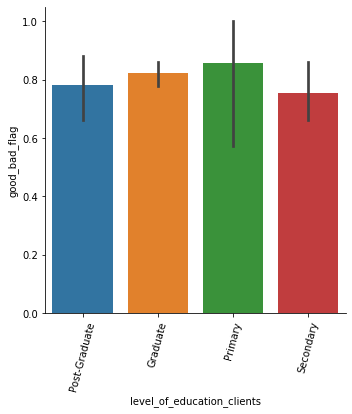

In [11]:
sns.catplot(x="level_of_education_clients", y="good_bad_flag", data = train, kind = "bar")
plt.xticks(rotation=75)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

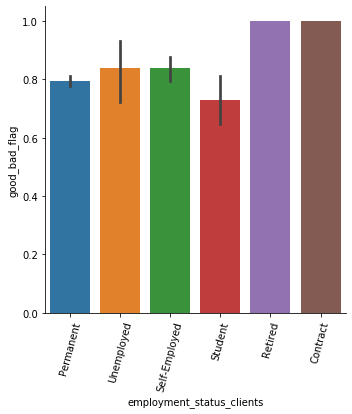

In [12]:
sns.catplot(x="employment_status_clients", y="good_bad_flag", data = train, kind = "bar")
plt.xticks(rotation=75)

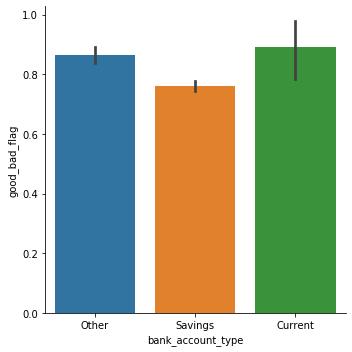

In [13]:
sns.catplot(x="bank_account_type", y="good_bad_flag", data = train, kind = "bar")

#### Creating features

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4376 entries, 0 to 4375
Data columns (total 18 columns):
customerid                    4376 non-null object
systemloanid                  4376 non-null int64
loannumber                    4376 non-null int64
approveddate                  4376 non-null datetime64[ns]
creationdate                  4376 non-null datetime64[ns]
loanamount                    4376 non-null float64
totaldue                      4376 non-null float64
termdays                      4376 non-null int64
referredby                    589 non-null object
good_bad_flag                 4376 non-null int64
birthdate                     3277 non-null datetime64[ns]
bank_account_type             3277 non-null object
longitude_gps                 3277 non-null float64
latitude_gps                  3277 non-null float64
bank_name_clients             3277 non-null object
bank_branch_clients           33 non-null object
employment_status_clients     2784 non-null object
level

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

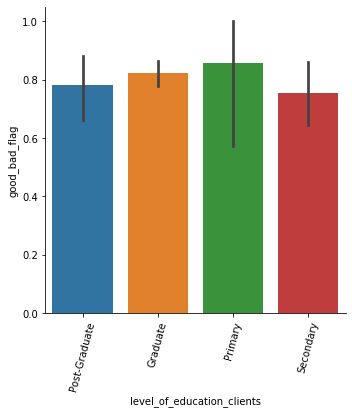

In [15]:
sns.catplot(x="level_of_education_clients", y="good_bad_flag", data = train, kind = "bar")
plt.xticks(rotation=75)

In [16]:
train['bank_name_clients'] = train['bank_name_clients'].apply(lambda x: "null" if pd.isna(x) else x)
train['bank_account_type'] = train['bank_account_type'].apply(lambda x: "null" if pd.isna(x) else x)
train['employment_status_clients'] = train['employment_status_clients'].apply(lambda x: "null" if pd.isna(x) else x)
train['level_of_education_clients'] = train['level_of_education_clients'].apply(lambda x: "null" if pd.isna(x) else x)

In [17]:
list(train['bank_name_clients'].unique())

['Diamond Bank',
 'GT Bank',
 'EcoBank',
 'First Bank',
 'null',
 'Access Bank',
 'UBA',
 'Union Bank',
 'FCMB',
 'Zenith Bank',
 'Stanbic IBTC',
 'Fidelity Bank',
 'Wema Bank',
 'Sterling Bank',
 'Skye Bank',
 'Keystone Bank',
 'Heritage Bank',
 'Unity Bank',
 'Standard Chartered']

In [18]:
train[20:40]

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
20,8a858e885c17687c015c19eead6338fd,301964283,3,2017-07-05 07:34:08,2017-07-05 06:34:02,10000.0,13000.0,30,8a858ff85bd93919015bda56605652bd,1,1978-03-14,Savings,3.345346,6.561731,GT Bank,NaN,Permanent,null
21,8a858e8f5d41c974015d4b7f31865627,302003432,2,2017-07-30 13:26:07,2017-07-30 12:25:59,10000.0,11500.0,15,8a858e495d1e235c015d30d5ddb42149,0,1993-09-09,Savings,3.524664,6.659243,First Bank,NaN,Permanent,null
22,8a858e9b5a195041015a1a602a51519d,301976439,7,2017-07-13 17:38:01,2017-07-13 16:37:55,25000.0,28750.0,30,NaN,1,1983-02-02,Savings,7.169430,9.217407,GT Bank,NaN,null,null
23,8a858ea555d9e6020155f489c9b237f8,301973446,3,2017-07-11 17:22:01,2017-07-11 16:21:55,10000.0,13000.0,30,NaN,1,1982-05-29,Savings,3.870143,7.397926,GT Bank,NaN,Permanent,null
24,8a858eb05d2d1297015d313b03581809,301999087,2,2017-07-27 16:22:07,2017-07-27 15:22:01,10000.0,13000.0,30,NaN,1,1988-05-02,Savings,3.980987,7.423930,GT Bank,NaN,Permanent,null
25,8a858eb85c1be44c015c1c4b667d25ee,301963210,3,2017-07-04 13:53:57,2017-07-04 12:53:49,10000.0,13000.0,30,NaN,1,1987-10-26,Savings,3.357630,6.668355,GT Bank,NaN,Permanent,null
26,8a858ec75bfd77c4015c0d841520351c,301959286,4,2017-07-01 18:36:47,2017-07-01 17:36:40,20000.0,24500.0,30,NaN,1,1992-07-16,Savings,6.800408,6.159443,Union Bank,NaN,Permanent,null
27,8a858ed35cc5ce51015cc60f40f522b4,301981535,2,2017-07-17 10:33:52,2017-07-17 09:33:45,10000.0,11500.0,15,8a858edc59ee87640159eeb9774f1aa7,1,1984-07-01,Savings,3.220503,6.531905,GT Bank,NaN,Permanent,null
28,8a858edb5ad79cc6015ad7c9b29415c8,301981500,5,2017-07-17 10:17:01,2017-07-17 09:15:48,20000.0,22250.0,15,NaN,1,1986-08-16,Savings,3.479829,6.448969,GT Bank,NaN,Permanent,null
29,8a858ee55830c4b90158337542ab18a1,301972649,6,2017-07-11 09:28:30,2017-07-11 08:27:20,10000.0,13000.0,30,NaN,0,NaT,null,NaN,NaN,null,NaN,null,null


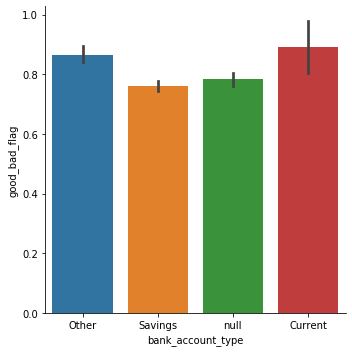

In [19]:
sns.catplot(x="bank_account_type", y="good_bad_flag", data = train, kind = "bar")

In [20]:
###Extracting current age from birthdate
current_year = 2022
train["birthdate"] = current_year - train["birthdate"].dt.year

In [21]:
train["birthdate"].fillna(train["birthdate"].median(), inplace = True)

In [22]:
train.corr()

,systemloanid,loannumber,loanamount,totaldue,termdays,good_bad_flag,birthdate,longitude_gps,latitude_gps
systemloanid,1.000000,-0.046517,-0.057344,-0.061673,-0.065447,0.006312,0.006568,-0.008483,-0.004570
loannumber,-0.046517,1.000000,0.833489,0.815476,0.405449,0.090408,-0.007445,-0.007593,-0.000543
loanamount,-0.057344,0.833489,1.000000,0.994396,0.559202,0.115246,0.010884,-0.001301,0.010006
totaldue,-0.061673,0.815476,0.994396,1.000000,0.627943,0.108358,0.013624,-0.001766,0.007852
termdays,-0.065447,0.405449,0.559202,0.627943,1.000000,0.005335,-0.004597,0.003204,-0.008003
good_bad_flag,0.006312,0.090408,0.115246,0.108358,0.005335,1.000000,0.051668,0.000160,-0.036336
birthdate,0.006568,-0.007445,0.010884,0.013624,-0.004597,0.051668,1.000000,0.002347,-0.027011
longitude_gps,-0.008483,-0.007593,-0.001301,-0.001766,0.003204,0.000160,0.002347,1.000000,-0.253237
latitude_gps,-0.004570,-0.000543,0.010006,0.007852,-0.008003,-0.036336,-0.027011,-0.253237,1.000000


In [23]:
train.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,NaN,1,50.0,Other,3.432010,6.433055,Diamond Bank,NaN,Permanent,Post-Graduate
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,NaN,1,37.0,Savings,3.885298,7.320700,GT Bank,"DUGBE,IBADAN",Permanent,Graduate
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,NaN,1,38.0,Other,11.139350,10.292041,EcoBank,NaN,Permanent,null
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,NaN,1,45.0,Savings,3.985770,7.491708,First Bank,NaN,Permanent,null
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,NaN,1,36.0,Other,7.457913,9.076574,GT Bank,NaN,Permanent,Primary


In [24]:
len(train[(pd.isna(train['referredby'])!=True) & (train["good_bad_flag"]==0)])

134

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4376 entries, 0 to 4375
Data columns (total 18 columns):
customerid                    4376 non-null object
systemloanid                  4376 non-null int64
loannumber                    4376 non-null int64
approveddate                  4376 non-null datetime64[ns]
creationdate                  4376 non-null datetime64[ns]
loanamount                    4376 non-null float64
totaldue                      4376 non-null float64
termdays                      4376 non-null int64
referredby                    589 non-null object
good_bad_flag                 4376 non-null int64
birthdate                     4376 non-null float64
bank_account_type             4376 non-null object
longitude_gps                 3277 non-null float64
latitude_gps                  3277 non-null float64
bank_name_clients             4376 non-null object
bank_branch_clients           33 non-null object
employment_status_clients     4376 non-null object
level_of_edu

#### Feature engineering

In [26]:
len(train[(train['birthdate']>40) & (train["good_bad_flag"] == 0)])

203

In [27]:
def daily_interest_rate(loaned, returned, term):
    interest_rate = ((returned -loaned)/loaned) * 100
    daily_rate = interest_rate/term
    return daily_rate

In [28]:
train["daily_rate"] = train.apply(lambda x: daily_interest_rate(x["loanamount"], x["totaldue"], x["termdays"]),axis=1)

In [29]:
train['hour_of_creation'] = train['creationdate'].dt.hour

In [30]:
train['hour_of_approval'] = train['approveddate'].dt.hour

In [31]:
train.corr()

,systemloanid,loannumber,loanamount,totaldue,termdays,good_bad_flag,birthdate,longitude_gps,latitude_gps,daily_rate,hour_of_creation,hour_of_approval
systemloanid,1.000000,-0.046517,-0.057344,-0.061673,-0.065447,0.006312,0.006568,-0.008483,-0.004570,0.061114,0.027059,0.036087
loannumber,-0.046517,1.000000,0.833489,0.815476,0.405449,0.090408,-0.007445,-0.007593,-0.000543,-0.860604,-0.015266,-0.020892
loanamount,-0.057344,0.833489,1.000000,0.994396,0.559202,0.115246,0.010884,-0.001301,0.010006,-0.941645,-0.011762,-0.021525
totaldue,-0.061673,0.815476,0.994396,1.000000,0.627943,0.108358,0.013624,-0.001766,0.007852,-0.931044,-0.010907,-0.021203
termdays,-0.065447,0.405449,0.559202,0.627943,1.000000,0.005335,-0.004597,0.003204,-0.008003,-0.501287,0.001424,-0.011107
good_bad_flag,0.006312,0.090408,0.115246,0.108358,0.005335,1.000000,0.051668,0.000160,-0.036336,-0.144678,0.003002,0.013163
birthdate,0.006568,-0.007445,0.010884,0.013624,-0.004597,0.051668,1.000000,0.002347,-0.027011,0.007246,-0.028630,-0.025074
longitude_gps,-0.008483,-0.007593,-0.001301,-0.001766,0.003204,0.000160,0.002347,1.000000,-0.253237,0.000572,-0.010168,-0.009154
latitude_gps,-0.004570,-0.000543,0.010006,0.007852,-0.008003,-0.036336,-0.027011,-0.253237,1.000000,-0.004208,-0.016418,-0.003454
daily_rate,0.061114,-0.860604,-0.941645,-0.931044,-0.501287,-0.144678,0.007246,0.000572,-0.004208,1.000000,0.015244,0.023457


In [32]:
train_prev.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,NaN,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,NaN,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,NaN,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,10000.0,11500.0,15,2017-04-24 01:35:52.000000,NaN,2017-04-24 00:00:00.000000,2017-04-24 00:48:43.000000
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,10000.0,11500.0,15,2017-07-14 21:18:43.000000,NaN,2017-07-03 00:00:00.000000,2017-07-14 21:08:35.000000


In [33]:
past_amount_borrowed = train_prev.groupby(by ='customerid')['loanamount'].agg(["count",'sum'])

In [34]:
past_amount_borrowed.head()

,count,sum
customerid,,
8a1088a0484472eb01484669e3ce4e0b,1,10000.0
8a1a1e7e4f707f8b014f797718316cad,4,70000.0
8a1a32fc49b632520149c3b8fdf85139,7,90000.0
8a1eb5ba49a682300149c3c068b806c7,8,130000.0
8a1edbf14734127f0147356fdb1b1eb2,2,20000.0


In [35]:
train=train.merge(right =past_amount_borrowed, on ='customerid',how='left' )

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4376 entries, 0 to 4375
Data columns (total 23 columns):
customerid                    4376 non-null object
systemloanid                  4376 non-null int64
loannumber                    4376 non-null int64
approveddate                  4376 non-null datetime64[ns]
creationdate                  4376 non-null datetime64[ns]
loanamount                    4376 non-null float64
totaldue                      4376 non-null float64
termdays                      4376 non-null int64
referredby                    589 non-null object
good_bad_flag                 4376 non-null int64
birthdate                     4376 non-null float64
bank_account_type             4376 non-null object
longitude_gps                 3277 non-null float64
latitude_gps                  3277 non-null float64
bank_name_clients             4376 non-null object
bank_branch_clients           33 non-null object
employment_status_clients     4376 non-null object
level_of_edu

In [37]:
train['count'].fillna(0, inplace =True)
train['sum'].fillna(0, inplace =True)

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4376 entries, 0 to 4375
Data columns (total 23 columns):
customerid                    4376 non-null object
systemloanid                  4376 non-null int64
loannumber                    4376 non-null int64
approveddate                  4376 non-null datetime64[ns]
creationdate                  4376 non-null datetime64[ns]
loanamount                    4376 non-null float64
totaldue                      4376 non-null float64
termdays                      4376 non-null int64
referredby                    589 non-null object
good_bad_flag                 4376 non-null int64
birthdate                     4376 non-null float64
bank_account_type             4376 non-null object
longitude_gps                 3277 non-null float64
latitude_gps                  3277 non-null float64
bank_name_clients             4376 non-null object
bank_branch_clients           33 non-null object
employment_status_clients     4376 non-null object
level_of_edu

In [39]:
train.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag,...,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,daily_rate,hour_of_creation,hour_of_approval,count,sum
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,NaN,1,...,6.433055,Diamond Bank,NaN,Permanent,Post-Graduate,0.500000,7,8,11.0,200000.0
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,NaN,1,...,7.320700,GT Bank,"DUGBE,IBADAN",Permanent,Graduate,0.500000,16,17,0.0,0.0
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,NaN,1,...,10.292041,EcoBank,NaN,Permanent,null,0.750000,13,14,6.0,60000.0
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,NaN,1,...,7.491708,First Bank,NaN,Permanent,null,1.000000,18,19,2.0,20000.0
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,NaN,1,...,9.076574,GT Bank,NaN,Permanent,Primary,0.333333,22,23,8.0,150000.0


In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4376 entries, 0 to 4375
Data columns (total 23 columns):
customerid                    4376 non-null object
systemloanid                  4376 non-null int64
loannumber                    4376 non-null int64
approveddate                  4376 non-null datetime64[ns]
creationdate                  4376 non-null datetime64[ns]
loanamount                    4376 non-null float64
totaldue                      4376 non-null float64
termdays                      4376 non-null int64
referredby                    589 non-null object
good_bad_flag                 4376 non-null int64
birthdate                     4376 non-null float64
bank_account_type             4376 non-null object
longitude_gps                 3277 non-null float64
latitude_gps                  3277 non-null float64
bank_name_clients             4376 non-null object
bank_branch_clients           33 non-null object
employment_status_clients     4376 non-null object
level_of_edu

In [41]:
train.describe(include ='O')

,customerid,referredby,bank_account_type,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
count,4376,589,4376,4376,33,4376,4376
unique,4368,521,4,19,31,7,5
top,8a858f1e5baffcc9015bb02b505f180d,8a858fc55b2548dd015b286e452c678c,Savings,GT Bank,OGBA,Permanent,null
freq,2,8,2578,1210,3,2348,3933


In [42]:
###Categories to encode
small_cat = ['bank_account_type','employment_status_clients','level_of_education_clients']
large_cat =['bank_name_clients']

In [43]:
train.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag,...,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,daily_rate,hour_of_creation,hour_of_approval,count,sum
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,NaN,1,...,6.433055,Diamond Bank,NaN,Permanent,Post-Graduate,0.500000,7,8,11.0,200000.0
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,NaN,1,...,7.320700,GT Bank,"DUGBE,IBADAN",Permanent,Graduate,0.500000,16,17,0.0,0.0
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,NaN,1,...,10.292041,EcoBank,NaN,Permanent,null,0.750000,13,14,6.0,60000.0
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,NaN,1,...,7.491708,First Bank,NaN,Permanent,null,1.000000,18,19,2.0,20000.0
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,NaN,1,...,9.076574,GT Bank,NaN,Permanent,Primary,0.333333,22,23,8.0,150000.0


In [45]:
one_hot_enc = ce.OneHotEncoder(cols=small_cat)
train = one_hot_enc.fit_transform(train)

In [46]:
label_enc = LabelEncoder()
label_enc.fit(train[large_cat])
train[large_cat] = label_enc.transform(train[large_cat])

C:\Users\kolade\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kolade\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [47]:
train.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag,...,level_of_education_clients_1,level_of_education_clients_2,level_of_education_clients_3,level_of_education_clients_4,level_of_education_clients_5,daily_rate,hour_of_creation,hour_of_approval,count,sum
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,NaN,1,...,1,0,0,0,0,0.500000,7,8,11.0,200000.0
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,NaN,1,...,0,1,0,0,0,0.500000,16,17,0.0,0.0
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,NaN,1,...,0,0,1,0,0,0.750000,13,14,6.0,60000.0
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,NaN,1,...,0,0,1,0,0,1.000000,18,19,2.0,20000.0
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,NaN,1,...,0,0,0,1,0,0.333333,22,23,8.0,150000.0


In [48]:
def map_hours(x):
    if x in [0,1,2,3,4,5]:
        return 0
    elif x in [6,7,8,9,10,11,12]:
        return 1
    elif x in [13,14,15,16]:
        return 2
    else:
        return 3

In [49]:
def percentage_difference_in_loan_borrowed(borrowed_loan, past_loans, number_of_past_loans):
    try:
        mean_amount_borrowed_perloan = past_loans/number_of_past_loans
        loan_diff = borrowed_loan - mean_amount_borrowed_perloan
        percentage_diff = (loan_diff/borrowed_loan) * 100
        return percentage_diff
    
    except:
        return 0

In [50]:
train['hour_of_approval'] = train['hour_of_approval'].map(map_hours)
train['hour_of_creation'] = train['hour_of_creation'].map(map_hours)

In [51]:
train['%amount_difference'] = train.apply(lambda x: percentage_difference_in_loan_borrowed(x['loanamount'],x['sum'],x['count']),axis=1)

In [52]:
train.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag,...,level_of_education_clients_2,level_of_education_clients_3,level_of_education_clients_4,level_of_education_clients_5,daily_rate,hour_of_creation,hour_of_approval,count,sum,%amount_difference
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,NaN,1,...,0,0,0,0,0.500000,1,1,11.0,200000.0,39.393939
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,NaN,1,...,1,0,0,0,0.500000,2,3,0.0,0.0,0.000000
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,NaN,1,...,0,1,0,0,0.750000,2,2,6.0,60000.0,50.000000
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,NaN,1,...,0,1,0,0,1.000000,3,3,2.0,20000.0,0.000000
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,NaN,1,...,0,0,1,0,0.333333,3,3,8.0,150000.0,53.125000


In [53]:
def view_full_frame(data_frame):
    pd.set_option('display.max_columns', len(data_frame))
    display(data_frame)
    pd.reset_option('display.max_columns')

In [54]:
prediction  = train['good_bad_flag']

In [55]:
### Dropping NaN values
train.drop(["customerid", 
            "systemloanid", 
            "approveddate", 
            "creationdate", 
            "referredby", 
            "longitude_gps", 
            "latitude_gps", 
            "bank_branch_clients", 
            "good_bad_flag"], axis=1, inplace = True)

In [56]:
view_full_frame(train.corr())

,loannumber,loanamount,totaldue,termdays,birthdate,bank_account_type_1,bank_account_type_2,bank_account_type_3,bank_account_type_4,bank_name_clients,employment_status_clients_1,employment_status_clients_2,employment_status_clients_3,employment_status_clients_4,employment_status_clients_5,employment_status_clients_6,employment_status_clients_7,level_of_education_clients_1,level_of_education_clients_2,level_of_education_clients_3,level_of_education_clients_4,level_of_education_clients_5,daily_rate,hour_of_creation,hour_of_approval,count,sum,%amount_difference
loannumber,1.000000,0.833489,0.815476,0.405449,-0.007445,0.441193,-0.308087,-0.007661,-0.022570,-0.007273,-0.078998,-0.096967,0.025194,0.299122,0.060966,0.025514,0.024136,0.134542,0.283581,-0.339147,0.013801,0.111721,-0.860604,-0.010606,-0.013017,0.999353,0.946078,0.528661
loanamount,0.833489,1.000000,0.994396,0.559202,0.010884,0.371107,-0.260096,-0.004242,-0.023762,-0.007328,-0.077116,-0.071325,0.006344,0.254819,0.059332,0.016734,0.017156,0.126996,0.239756,-0.282154,0.024140,0.067273,-0.941645,-0.009647,-0.016770,0.832324,0.855436,0.786095
totaldue,0.815476,0.994396,1.000000,0.627943,0.013624,0.363947,-0.254914,-0.004049,-0.024566,-0.007344,-0.072684,-0.071150,0.004465,0.247097,0.057970,0.015507,0.018670,0.122930,0.238406,-0.280299,0.023813,0.069239,-0.931044,-0.009279,-0.017150,0.814301,0.830410,0.801014
termdays,0.405449,0.559202,0.627943,1.000000,-0.004597,0.209697,-0.148231,0.001198,-0.022628,-0.011122,-0.017421,-0.056412,-0.005727,0.113166,0.051941,0.001927,0.040362,0.074089,0.152691,-0.180312,0.002551,0.054592,-0.501287,-0.002227,-0.010773,0.404204,0.430301,0.404339
birthdate,-0.007445,0.010884,0.013624,-0.004597,1.000000,0.016372,0.037411,-0.074764,0.080243,-0.069332,0.049398,-0.008028,-0.053381,0.071454,-0.219540,0.057247,-0.007638,0.022514,0.004557,-0.020644,0.010963,0.018254,0.007246,-0.028253,-0.024607,-0.008312,0.000169,0.024005
bank_account_type_1,0.441193,0.371107,0.363947,0.209697,0.016372,1.000000,-0.501484,-0.242533,-0.043166,-0.185837,0.062538,-0.307367,0.049307,0.386298,0.107833,0.029778,-0.006332,0.178254,0.408596,-0.471798,0.047430,0.123536,-0.383309,-0.016305,-0.014012,0.440778,0.432794,0.189254
bank_account_type_2,-0.308087,-0.260096,-0.254914,-0.148231,0.037411,-0.501484,1.000000,-0.693437,-0.123419,-0.551414,0.486905,-0.437241,0.017271,-0.143418,0.007702,-0.005479,-0.018103,-0.076289,-0.153405,0.170894,-0.013062,-0.024163,0.265961,0.007615,0.006123,-0.306648,-0.298833,-0.135484
bank_account_type_3,-0.007661,-0.004242,-0.004049,0.001198,-0.074764,-0.242533,-0.693437,1.000000,-0.059689,0.786215,-0.623126,0.765815,-0.057690,-0.150543,-0.093425,-0.017517,-0.008755,-0.062259,-0.162936,0.194357,-0.023180,-0.071110,0.007097,0.006960,0.005110,-0.008874,-0.011528,0.003215
bank_account_type_4,-0.022570,-0.023762,-0.024566,-0.022628,0.080243,-0.043166,-0.123419,-0.059689,1.000000,-0.033837,0.082310,-0.073285,-0.010268,-0.017592,-0.016628,-0.003118,0.146682,0.010002,0.005377,-0.002550,-0.004126,-0.012656,0.025954,-0.009366,-0.002311,-0.022898,-0.021426,-0.021276
bank_name_clients,-0.007273,-0.007328,-0.007344,-0.011122,-0.069332,-0.185837,-0.551414,0.786215,-0.033837,1.000000,-0.469016,0.585408,-0.057125,-0.131251,-0.059234,-0.022911,-0.010267,-0.043364,-0.129686,0.153732,-0.010161,-0.062374,0.005144,-0.005959,-0.016189,-0.007983,-0.012464,0.008157


In [57]:
scaled_data = ['loannumber', 'loanamount', 'totaldue', 'termdays', 'birthdate', 'daily_rate', 'hour_of_creation', 'hour_of_approval', 'count', 'sum', '%amount_difference']

In [58]:
scale = StandardScaler()
train[scaled_data] = scale.fit_transform(train[scaled_data])

In [59]:
train.head()

,loannumber,loanamount,totaldue,termdays,birthdate,bank_account_type_1,bank_account_type_2,bank_account_type_3,bank_account_type_4,bank_name_clients,...,level_of_education_clients_2,level_of_education_clients_3,level_of_education_clients_4,level_of_education_clients_5,daily_rate,hour_of_creation,hour_of_approval,count,sum,%amount_difference
0,1.870257,1.134749,1.109283,0.063720,2.315765,1,0,0,0,1,...,0,0,0,0,-1.155515,-0.683389,-0.823155,1.871670,1.477958,0.989838
1,-0.867773,-0.260884,-0.335157,0.063720,-0.129102,0,1,0,0,6,...,1,0,0,0,-1.155515,0.406845,1.343537,-1.138209,-0.772100,-0.718139
2,0.501242,0.204327,0.083521,-1.239256,0.058964,1,0,0,0,2,...,0,1,0,0,-0.174654,0.406845,0.260191,0.503543,-0.097083,1.449679
3,-0.593970,-0.726095,-0.816638,-1.239256,1.375431,0,1,0,0,5,...,0,1,0,0,0.806206,1.497079,1.343537,-0.590958,-0.547094,-0.718139
4,1.048848,2.065171,1.904772,0.063720,-0.317169,1,0,0,0,6,...,0,0,1,0,-1.809421,1.497079,1.343537,1.050794,0.915443,1.585167


In [61]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV

In [62]:
X_train,X_test,y_train,y_test = train_test_split(train,prediction,test_size=0.25,random_state=42)

In [63]:
forest2 = RandomForestClassifier(n_estimators=40, max_features=3,max_leaf_nodes=5,random_state=0)
forest2.fit(X_train,y_train)

RandomForestClassifier(max_features=3, max_leaf_nodes=5, n_estimators=40,
                       random_state=0)

In [64]:
print('the RandomForestClassifier accuracy score of train set is: {}'.format(accuracy_score(y_train,forest2.predict(X_train))))
print('the RandomForestClassifier accuracy score of test set is: {}'.format(accuracy_score(y_test,forest2.predict(X_test))))

the RandomForestClassifier accuracy score of train set is: 0.7830591102985984
the RandomForestClassifier accuracy score of test set is: 0.779707495429616


In [71]:
print('the RandomForestClassifier f1 score of train set is: {}'.format(f1_score(y_train,forest2.predict(X_train))))
print('the RandomForestClassifier f1 score of test set is: {}'.format(f1_score(y_test,forest2.predict(X_test))))

the RandomForestClassifier f1 score of train set is: 0.8783321941216679
the RandomForestClassifier f1 score of test set is: 0.8762198253723676


In [65]:
gbr= GradientBoostingClassifier()
gbr.fit(X_train, y_train)

print('the GradientBoostingClassifier accuracy score of train set is: {}'.format(accuracy_score(y_train, gbr.predict(X_train))))
print('the GradientBoostingClassifier accuracy score of test set is: {}'.format(accuracy_score(y_test, gbr.predict(X_test))))

the GradientBoostingClassifier accuracy score of train set is: 0.7970749542961609
the GradientBoostingClassifier accuracy score of test set is: 0.7778793418647166


In [70]:
print('the GradientBoostingClassifier F1 score of train set is: {}'.format(f1_score(y_train, gbr.predict(X_train))))
print('the GradientBoostingClassifier F1 score of test set is: {}'.format(f1_score(y_test, gbr.predict(X_test))))

the GradientBoostingClassifier F1 score of train set is: 0.8850535036244391
the GradientBoostingClassifier F1 score of test set is: 0.8745482705214249


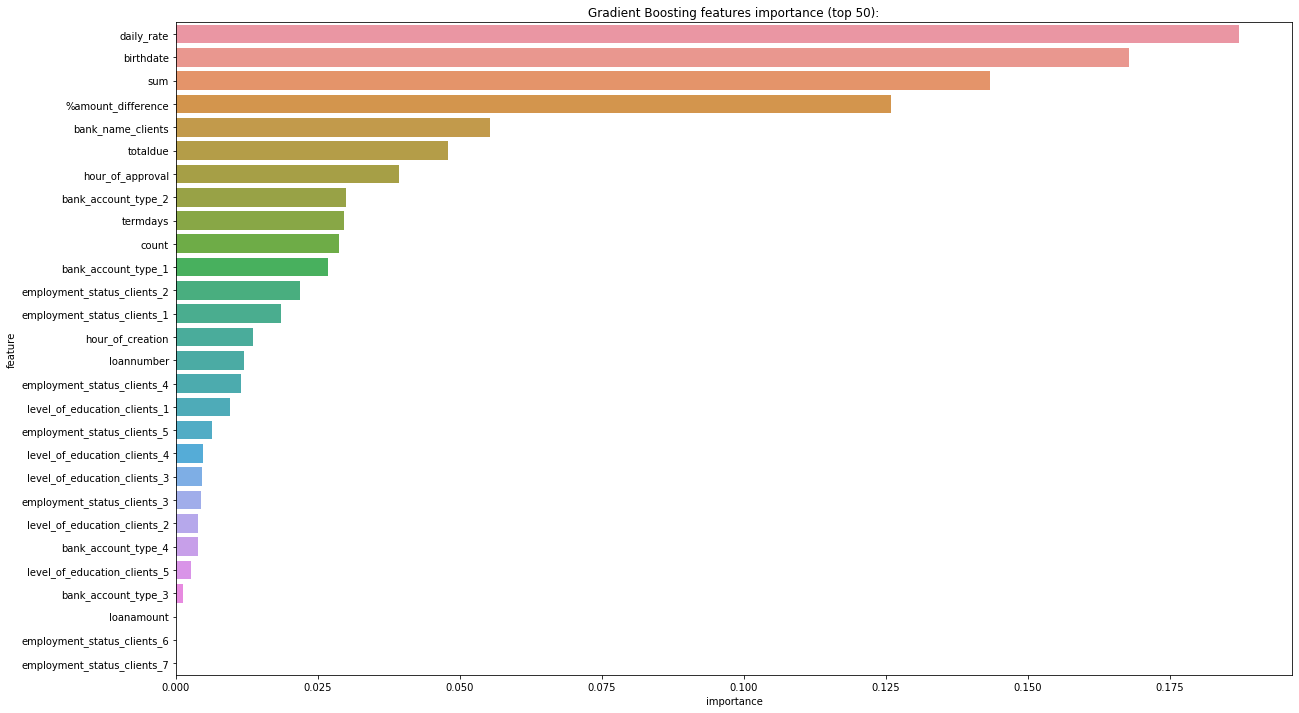

In [72]:
feature_importance_df = pd.DataFrame(gbr.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = train[list(train.columns)].columns

plt.figure(figsize=(20, 12));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(60))
plt.title('Gradient Boosting features importance (top 50):');

In [ ]:
feature_importance_df = pd.DataFrame(forest2.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = train[list(train.columns)].columns

plt.figure(figsize=(20, 12));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(60))
plt.title('RandomForest features importance (top 50):');

In [ ]:
gbr= GradientBoostingClassifier(learning_rate=0.1, max_depth=3, max_features=5, n_estimators=310,random_state=42)
gbr.fit(X_train, y_train)

print('the GradientBoostingClassifier 1-accuracy score of train set is: {}'.format(1- (accuracy_score(y_train, gbr.predict(X_train)))))
print('the GradientBoostingClassifier 1-accuracy score of test set is: {}'.format(1- (accuracy_score(y_test, gbr.predict(X_test)))))

In [ ]:
import pickle
pickle.dump(gbr, open('gBoost.pickle','wb'))

In [ ]:
gbr.get_params()

In [ ]:
from catboost import CatBoostClassifier
model = CatBoostClassifier()
model.fit(X_train,y_train,verbose=1)

In [ ]:
print('the CatBoost 1-accuracy score of train set is: {}'.format(1- (accuracy_score(y_train, model.predict(X_train)))))
print('the CatBoost 1-accuracy score of test set is: {}'.format(1- (accuracy_score(y_test, model.predict(X_test)))))

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [ ]:
forest2.get_params()

In [ ]:
forest_model = RandomForestClassifier()

In [ ]:
param_grid = {'n_estimators':[10, 30, 100, 300,500,1000], "max_depth": [3, 4, 5],
          "max_features": [1, 5, 10], "max_leaf_nodes": [3,5,7], "criterion": ["gini", "entropy"],'random_state':[42]}


In [ ]:
clf = GridSearchCV(forest_model, param_grid=param_grid, cv=StratifiedKFold(5)).fit(X_train, y_train)

In [ ]:
print('the RandomForestCV 1-accuracy score of train set is: {}'.format(1- (accuracy_score(y_train, clf.predict(X_train)))))
print('the RandomForestCV 1-accuracy score of test set is: {}'.format(1- (accuracy_score(y_test, clf.predict(X_test)))))

In [ ]:
clf.best_params_